In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

##### if the following prints a 200 status code, the script is communicating with the webstie!

In [278]:
#request a response from the website
response = requests.get("https://www.steamlocomotive.com/survivors/search.php?str=&country=USA")
print(response)

<Response [200]>


In [279]:
soup = BeautifulSoup(response.text, 'html.parser') #parse the html
table = soup.find('table') #find the table
df = pd.read_html(str(table))[0] #convert the table into a pandas dataframe

df.head(10)

,No.,Class,F.M. Whyte,Gauge,Railroad Line,Location,Status,Builder Info,Notes
0,253 (253),K-21,0-8-0,"4'-8½""",L&A (FEC),"Transportation and Interpretive Center, Abbevi...",restoration,"Alco (Richmond) #65770, 1924","From Nash, TX, then GCRM, then Hialeah yard, F..."
1,3415,3400,4-6-2,"4'-8½""",AT&SF,"Abilene & Smoky Valley Railroad, Abilene, KS",out of service,"Baldwin #51861, 1919",Restored to operation in 2009. Taken out of se...
2,433,M,4-8-0,"4'-8½""",N&W,"The Virginia Creeper Trail 1, Abingdon, VA",display,"Alco (Richmond) #40329, 1907",Underwent a cosmetic restoration in August 2023.
3,3 (8),NaN,0-4-0T,"4'-8½""",US Navy,"Atlantic County Harley-Davidson, Absecon, NJ",display,"Alco (Cooke) #59957, 1918",NaN
4,NaN,NaN,0-4-0T,"24""",Gruen & Bilfinger AG,"Quaker Square, Akron, OH",display,"Henschel & Sohn (Kassel) #23033, 1936",Owned by the University of Akron. For sale as ...
5,1548,G-3,0-6-0,"4'-8½""",CB&Q,"Quaker Square, Akron, OH",display,"Baldwin #38838, 1912",Owned by the University of Akron. Poor conditi...
6,169,T-12,4-6-0,"36""",D&RGW (D&RG),"Cole Park, Alamosa, CO",display,"Baldwin #7028, 1883",Underwent a cosmetic restoration between 2009 ...
7,107 (88),65,4-6-2,"4'-8½""",GAN (FEC),"Thronateeska Heritage Center, Albany, GA",restoration,"Alco (Schenectady) #50133, 1911",Cosmetic restoration only.
8,2926,2900,4-8-4,"4'-8½""",AT&SF,"New Mexico Heritage Rail, Albuquerque, NM",operational,"Baldwin #69814, 1944",Previously placed on display in Coronado Park....
9,20,SC-4,2-8-0,"4'-8½""",GCY (LS&I),"Allen Heritage Center, Allen, TX",display,"Alco (Pittsburg) #46943, 1910","From the Grand Canyon Railway, Williams, AZ."


In [280]:
unique_wheel = df['F.M. Whyte'].unique() #show unique wheel arrangements 
states =[
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
    'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
    'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
] #create a list of state codes

#wheel_road = unique_rrs + unique_wheel.tolist() #combine the two lists
df_comparison = pd.DataFrame(index=states, columns=unique_wheel, data=0)

#iterate through the dataframe
for index, row in df.iterrows():
    
    state = row["Location"][-2:] #grab the state
    wheel_arr = row["F.M. Whyte"]
    
    df_comparison.loc[state, wheel_arr] += 1

df_comparison.head(10)

,0-8-0,4-6-2,4-8-0,0-4-0T,0-6-0,4-6-0,4-8-4,2-8-0,0-4-4RT,2-4-4T,...,4-6-4T,2-8-8-2,4-4-0C,0-8-0F,0-4-0C,2-4-4-2,Pole2Tr,2-8-8-0,Heisler,4-4-2T
AL,1,0,0,4,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
AK,0,0,0,3,0,4,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ,0,0,0,5,0,2,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,1,0,3,0,3,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,1,8,1,27,17,8,4,15,2,2,...,0,0,0,0,0,1,0,0,0,0
CO,0,1,0,8,1,4,2,18,0,0,...,0,0,0,0,0,0,0,0,0,0
CT,0,1,0,4,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
DC,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FL,0,4,0,2,2,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# All the following code uses modifed code from Professor Cody Buntain's GitHub

#### Finding K

In [351]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

In [352]:
df_comparison.columns = df_comparison.columns.astype(str) #ensure columns are strings

# Let us test different values of k
interia_scores = []

for test_k in sorted(set(np.random.randint(1,50,20))):
    print("Test k:", test_k)
    
    tmp_model = MiniBatchKMeans(
        n_clusters=test_k,  
        n_init=16, max_iter=2048, tol=0.5, reassignment_ratio=0.5
    )
    tmp_model.fit(df_comparison)
    
    score = tmp_model.inertia_
    interia_scores.append((test_k, score))

Test k: 6
Test k: 7
Test k: 8
Test k: 12
Test k: 14
Test k: 15
Test k: 19
Test k: 25
Test k: 28
Test k: 32
Test k: 34
Test k: 36
Test k: 38
Test k: 39
Test k: 41
Test k: 45
Test k: 46


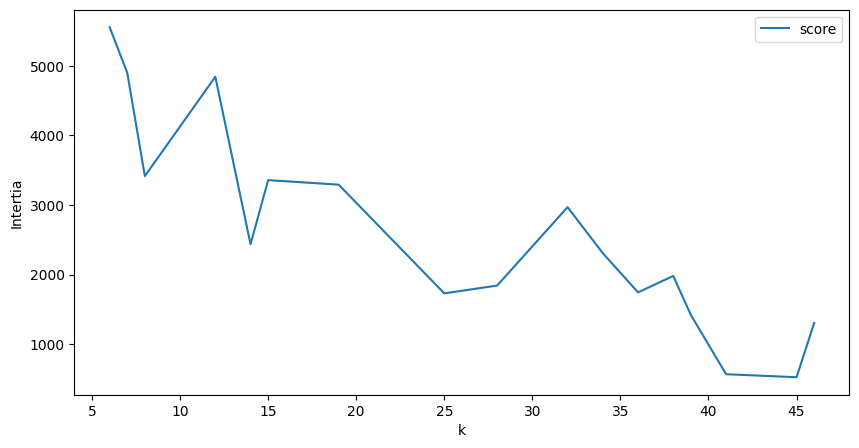

In [354]:
intertia_df = pd.DataFrame(interia_scores, columns=["k", "score"])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

intertia_df.sort_values(by="k").plot("k", "score", ax=ax)

ax.set_ylabel("Intertia")

plt.show()

#### Picking a K-means of about 25

## Creating the clusters

In [347]:
from sklearn.cluster import KMeans

In [355]:
k = 25
cluster_model = KMeans(n_clusters=k)
cluster_model.fit(df_comparison)

KMeans(n_clusters=25)

In [356]:
cluster_labels = cluster_model.predict(df_comparison)
loco_cluster_df = pd.DataFrame(cluster_labels, index=df_comparison.index, columns=["cluster"])
loco_cluster_df["cluster"].value_counts()

cluster
18    11
11     5
0      5
23     4
4      3
24     3
12     2
16     1
13     1
15     1
8      1
21     1
14     1
1      1
17     1
7      1
22     1
9      1
3      1
2      1
6      1
10     1
19     1
5      1
20     1
Name: count, dtype: int64

In [357]:
for cluster,locos in loco_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", locos.shape[0])
    
    for state in locos.index:
        print(state)
        #print("\t", a_id, loco_cluster_df[a_id])

Cluster: 0 Size: 5
LA
MS
NJ
NM
SC
Cluster: 1 Size: 1
PA
Cluster: 2 Size: 1
MI
Cluster: 3 Size: 1
CA
Cluster: 4 Size: 3
GA
NV
TN
Cluster: 5 Size: 1
KS
Cluster: 6 Size: 1
CO
Cluster: 7 Size: 1
OH
Cluster: 8 Size: 1
WA
Cluster: 9 Size: 1
MO
Cluster: 10 Size: 1
ME
Cluster: 11 Size: 5
AL
AZ
IN
MT
NY
Cluster: 12 Size: 2
MD
VA
Cluster: 13 Size: 1
IL
Cluster: 14 Size: 1
SD
Cluster: 15 Size: 1
WV
Cluster: 16 Size: 1
HI
Cluster: 17 Size: 1
OR
Cluster: 18 Size: 11
DC
DE
ID
KY
MA
ND
OK
RI
UT
VT
WY
Cluster: 19 Size: 1
FL
Cluster: 20 Size: 1
WI
Cluster: 21 Size: 1
TX
Cluster: 22 Size: 1
NH
Cluster: 23 Size: 4
AK
AR
CT
IA
Cluster: 24 Size: 3
MN
NE
NC


#### The following code blocks will help to identify which states have which wheel arrangements

In [360]:
state = "MD" #enter state here

state_data = df_comparison.loc[state]

type(state_data)

for arrangement, quantity in state_data.items():
    
    if quantity > 0:
        print(str(arrangement) + " : " + str(quantity))

0-8-0 : 1
4-6-2 : 2
0-4-0T : 1
0-6-0 : 1
4-6-0 : 3
4-8-4 : 1
2-8-0 : 4
0-4-0 : 4
4-4-0 : 4
2-6-0 : 1
2-8-2 : 1
2-2-2T : 1
0-4-0F : 1
2-2-0 : 1
2-6-6-6 : 1
2-8-4 : 1
4-2-0 : 1
4-4-2C : 1
4-6-0C : 1
4-6-4 : 1
Shay3Tr : 1


In [1]:
state = "VA" #enter state here

state_data = df_comparison.loc[state]

type(state_data)

for arrangement, quantity in state_data.items():
    
    if quantity > 0:
        print(str(arrangement) + " : " + str(quantity))

NameError: name 'df_comparison' is not defined